In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier

# import function to perform feature selection
from sklearn.feature_selection import RFE



plt.rcParams['figure.figsize'] = [15,8]

In [2]:
train  = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.000000,31397,7.000000,Emergency,Extreme,2,51-60,4911.000000,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,5954.000000,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,4745.000000,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,7272.000000,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,5558.000000,41-50


In [4]:
print(train.shape)
print(test.shape)

(318438, 18)
(137057, 17)


In [5]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [6]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

### Check Duplicates

In [7]:
train.duplicated().sum()

0

### Change Data Types

##### For Train Data

In [8]:
train['Hospital_code'] = train['Hospital_code'].astype(object)
train['City_Code_Hospital'] = train['City_Code_Hospital'].astype(object)
train['Available Extra Rooms in Hospital'] = train['Available Extra Rooms in Hospital'].astype(object)
train['Bed Grade'] = train['Bed Grade'].astype(object)
train['City_Code_Patient'] = train['City_Code_Patient'].astype(object)

In [9]:
train.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

##### For Test Data

In [10]:
test['Hospital_code'] = test['Hospital_code'].astype(object)
test['City_Code_Hospital'] = test['City_Code_Hospital'].astype(object)
test['Available Extra Rooms in Hospital'] = test['Available Extra Rooms in Hospital'].astype(object)
test['Bed Grade'] = test['Bed Grade'].astype(object)
test['City_Code_Patient'] = test['City_Code_Patient'].astype(object)

In [11]:
test.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

### Remove Insignificant Variables

In [12]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [13]:
test.drop(['case_id', 'patientid'], axis=1, inplace=True)

### Data Modifications

#### i) Stay

In [14]:
train['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

### Distribution of numeric independent variables

<Figure size 1080x576 with 0 Axes>

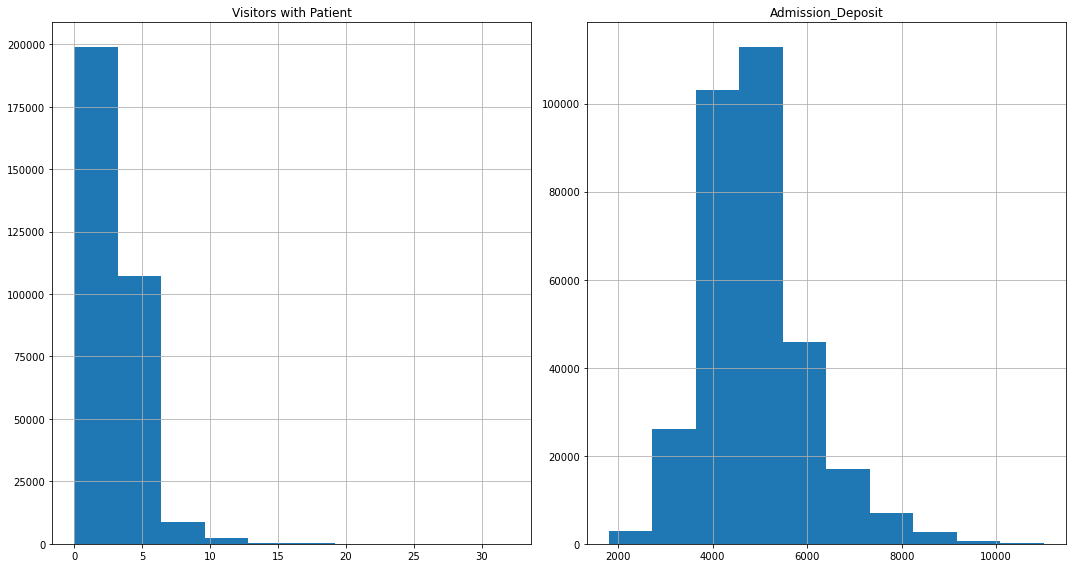

Skewness:


Hospital_code                       -0.280783
City_Code_Hospital                   0.538809
Available Extra Rooms in Hospital    0.971930
Bed Grade                            0.051754
City_Code_Patient                    1.581736
Visitors with Patient                3.137125
Admission_Deposit                    0.931454
dtype: float64

In [15]:
plt.figure(figsize=(15,8))

train.drop('Stay', axis = 1).hist()
plt.tight_layout()
plt.show()  

print('Skewness:')
train.drop('Stay', axis = 1).skew()

### EDA

#### Univariate Analysis

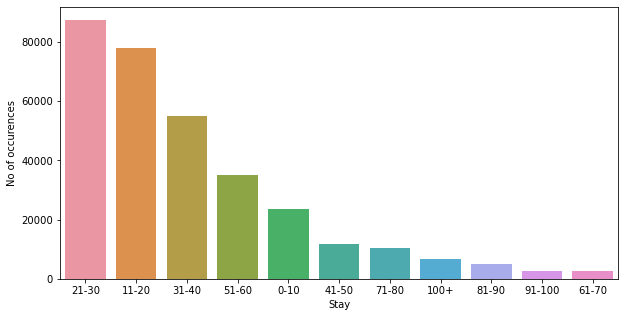

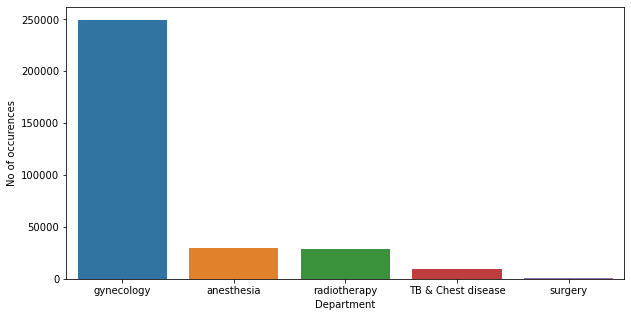

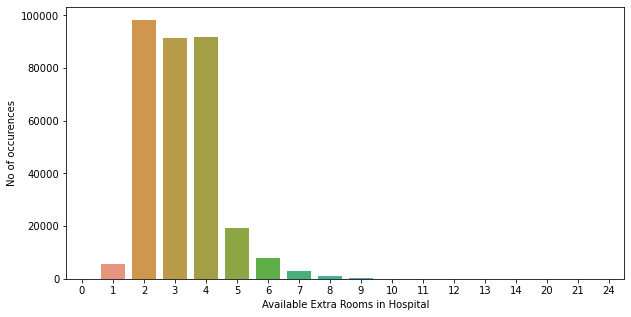

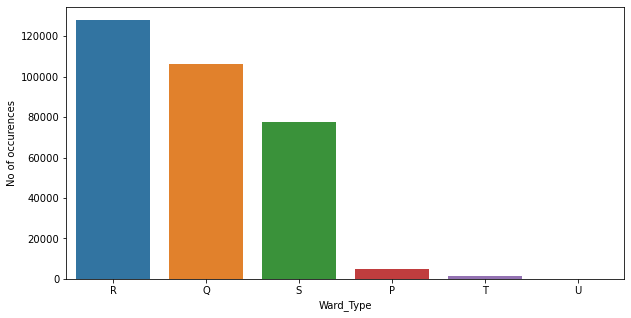

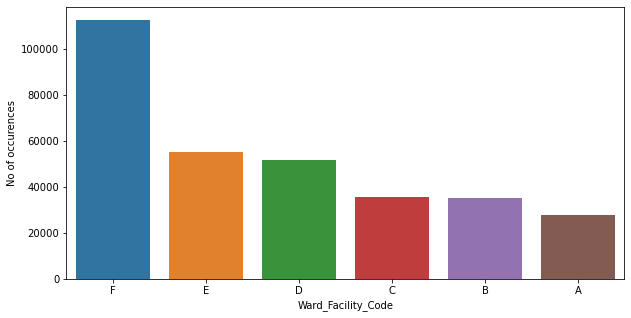

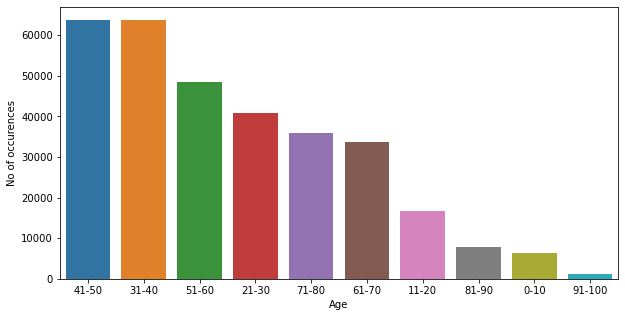

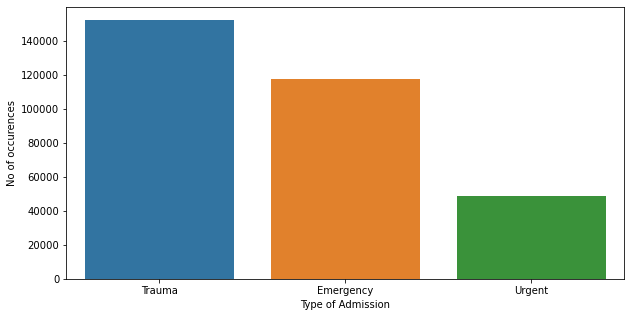

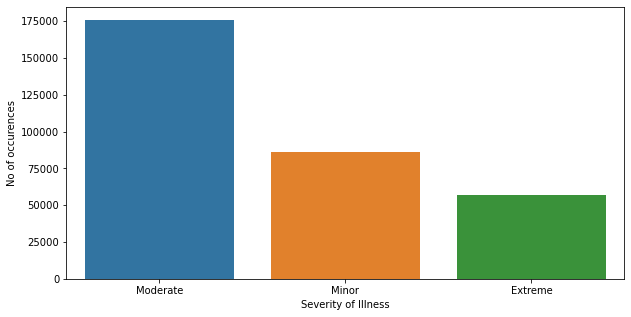

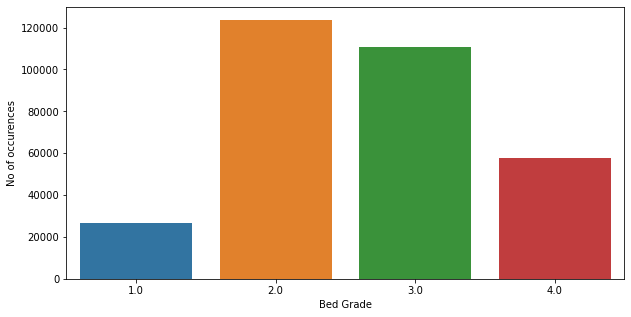

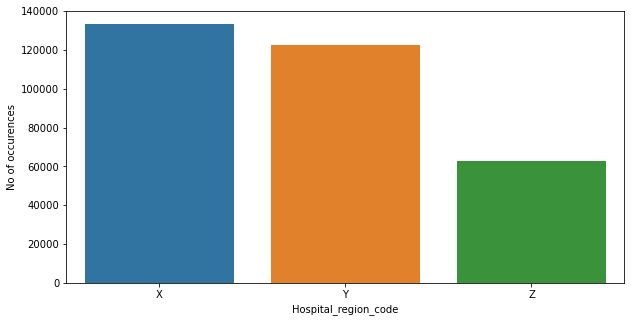

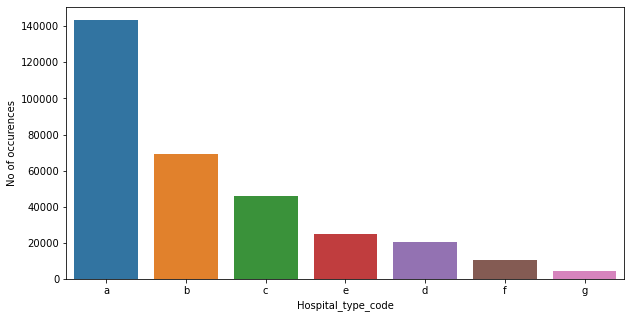

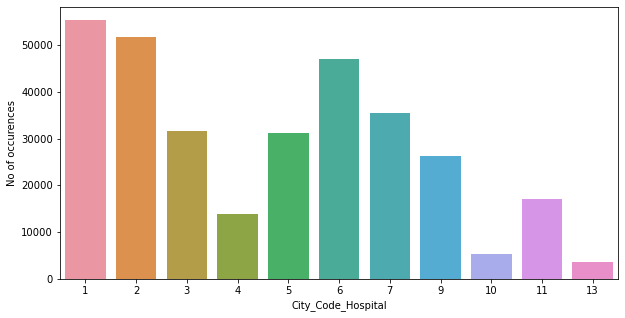

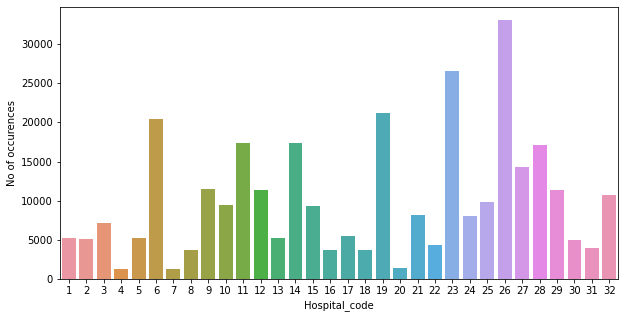

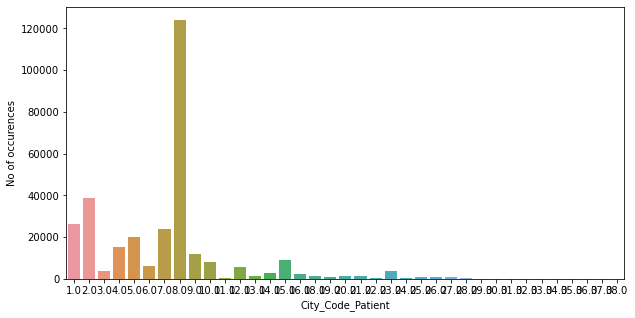

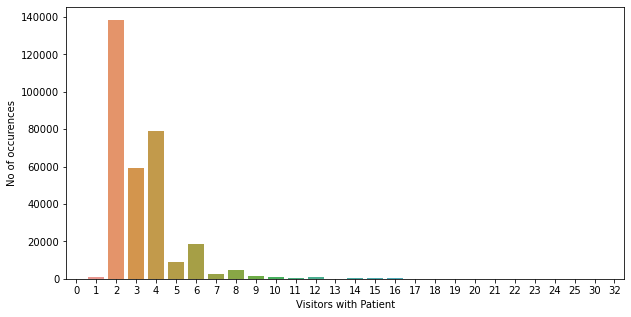

In [16]:
train['Stay'] .replace('More than 100 Days', '>100', inplace=True)

for i in [ 'Stay', 'Department', 'Available Extra Rooms in Hospital', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 
          'Type of Admission', 'Severity of Illness', 'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ,  
          'City_Code_Hospital', 'Hospital_code', 'City_Code_Patient', 'Visitors with Patient']:
            count = train[i].value_counts()

            plt.figure(figsize=(10,5))

            sns.barplot(x=count.index.values, y=count.values,data=train)
            
            plt.xlabel(i)
            plt.ylabel('No of occurences')

#### Bivariate Analysis

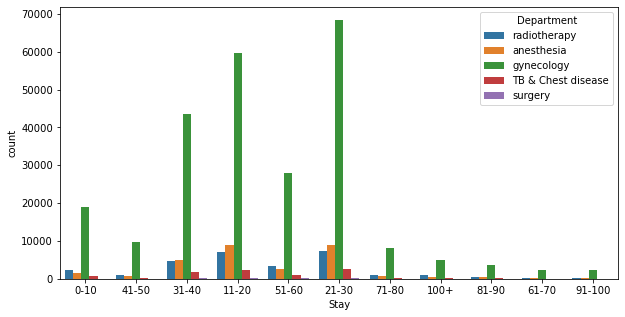

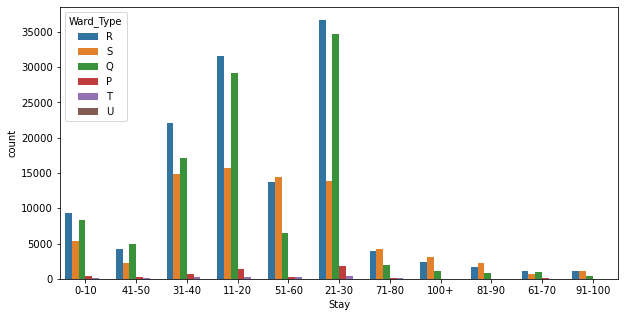

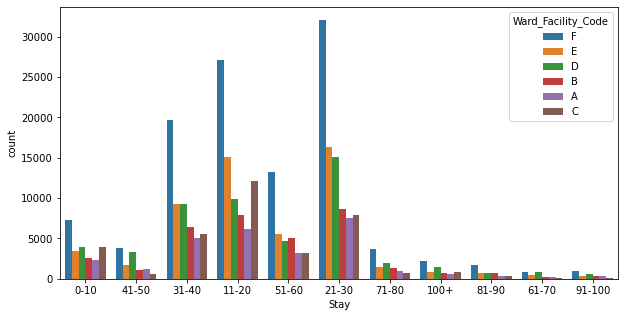

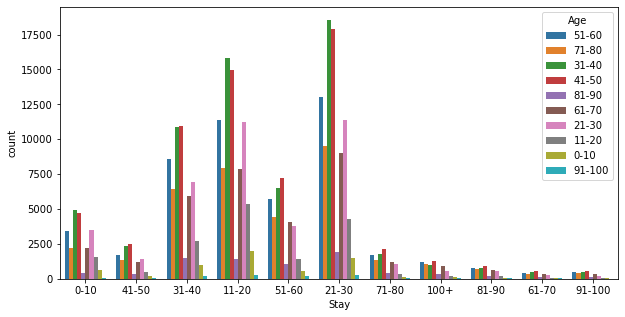

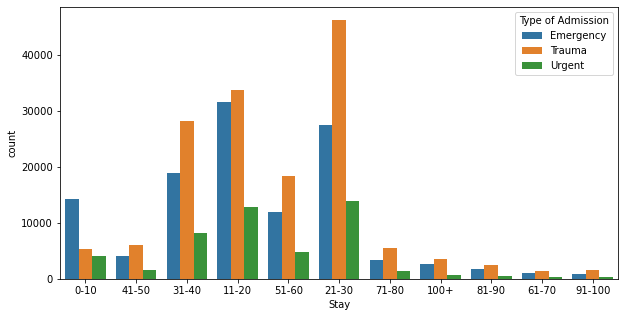

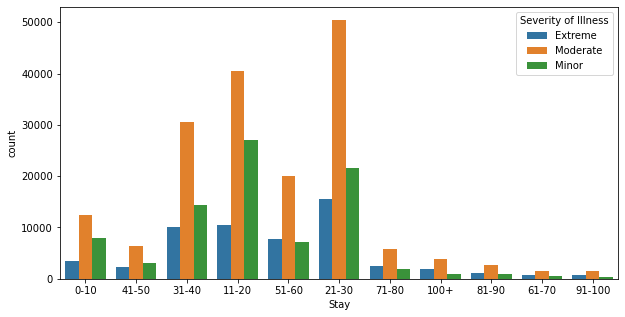

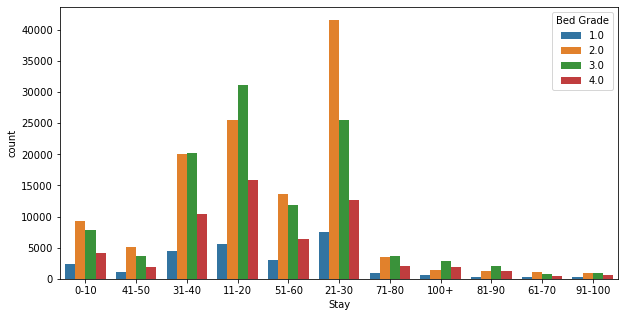

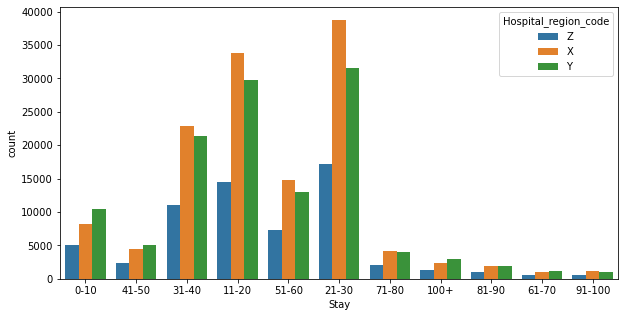

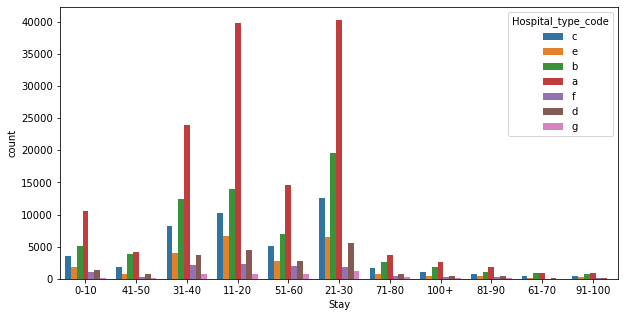

In [17]:
for i in [ 'Department', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 'Type of Admission', 'Severity of Illness', 
          'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ]:

            plt.figure(figsize=(10,5))

            sns.countplot(x='Stay',hue=i,data=train)

#### Numerical Features

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

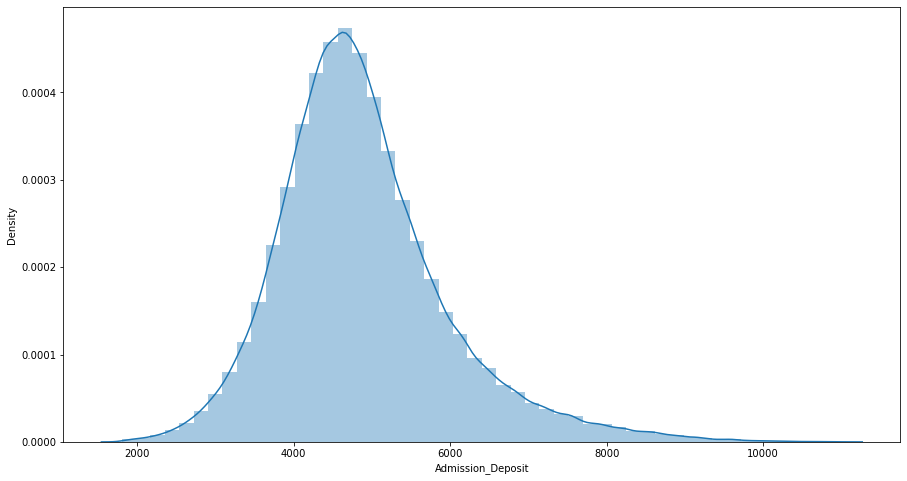

In [18]:
sns.distplot( train['Admission_Deposit'])

#### Missing Value Treatment

##### For Train Data

In [19]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


In [20]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


##### For Test Data

In [21]:
Total = test.isnull().sum().sort_values(ascending=False)          

Percent = (test.isnull().sum()*100/test.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,2157,1.573798
Bed Grade,35,0.025537
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


### Drop unwanted columns

In [22]:
train.dropna(subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

In [23]:
test['Bed Grade'] = test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)
test['City_Code_Patient'] = test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [24]:
df_num_train = train.select_dtypes([np.number])
df_num_train.head()

,Visitors with Patient,Admission_Deposit
0,2,4911.000000
1,2,5954.000000
2,2,4745.000000
3,2,7272.000000
4,2,5558.000000


In [25]:
df_cat_train = train.select_dtypes([np.object])
df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.000000,7.000000,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.000000,7.000000,Trauma,Extreme,51-60,41-50
2,10,e,1,X,2,anesthesia,S,E,2.000000,7.000000,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.000000,7.000000,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.000000,7.000000,Trauma,Extreme,51-60,41-50


In [26]:
df_num_test = test.select_dtypes([np.number])
df_num_test.head()

,Visitors with Patient,Admission_Deposit
0,2,3095.000000
1,4,4018.000000
2,3,4492.000000
3,3,4173.000000
4,4,4161.000000


In [27]:
df_cat_test = test.select_dtypes([np.object])
df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,21,c,3,Z,3,gynecology,S,A,None,None,Emergency,Moderate,71-80
1,29,a,4,X,2,gynecology,S,F,None,None,Trauma,Moderate,71-80
2,26,b,2,Y,3,gynecology,Q,D,None,None,Emergency,Moderate,71-80
3,6,a,6,X,3,gynecology,Q,F,None,None,Trauma,Moderate,71-80
4,28,b,11,X,2,gynecology,R,F,None,None,Trauma,Moderate,71-80


### Encoding

##### Ordinal Data

In [28]:
admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


df_cat_train['Type of Admission']  =  df_cat_train['Type of Admission'].map (admission_encode)
df_cat_train['Severity of Illness']  =  df_cat_train['Severity of Illness'].map (severity_encode)

df_cat_test['Type of Admission']  =  df_cat_test['Type of Admission'].map (admission_encode)
df_cat_test['Severity of Illness']  =  df_cat_test['Severity of Illness'].map (severity_encode)

In [29]:
df_cat_train['Stay']= df_cat_train['Stay'].replace({'0-10':1, '11-20':1, '21-30':1, '31-40':2, '41-50':2, '51-60':2,'61-70':2,
                                      '71-80':3,'81-90':3,'91-100':3,'100+':3})

df_cat_train['Age']= df_cat_train['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

df_cat_test['Age']= df_cat_test['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

In [30]:
df_cat_train['Stay']=df_cat_train['Stay'].astype(int)

##### Nominal Data

##### For Train Data

In [31]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_train['Hospital_code']=LE.fit_transform(df_cat_train['Hospital_code'])
df_cat_train['Hospital_type_code']=LE.fit_transform(df_cat_train['Hospital_type_code'])
df_cat_train['City_Code_Hospital']=LE.fit_transform(df_cat_train['City_Code_Hospital'])
df_cat_train['Hospital_region_code']=LE.fit_transform(df_cat_train['Hospital_region_code'])
df_cat_train['Department']=LE.fit_transform(df_cat_train['Department'])
df_cat_train['Ward_Type']=LE.fit_transform(df_cat_train['Ward_Type'])
df_cat_train['Ward_Facility_Code']=LE.fit_transform(df_cat_train['Ward_Facility_Code'])
df_cat_train['City_Code_Patient']=LE.fit_transform(df_cat_train['City_Code_Patient'])
df_cat_train['Bed Grade']=LE.fit_transform(df_cat_train['Bed Grade'])

df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,7,2,2,2,3,3,2,5,1,6,3,3,6,1
1,1,2,4,2,2,3,3,5,1,6,1,3,6,2
2,9,4,0,0,2,1,3,4,1,6,1,3,6,2
3,25,1,1,1,2,3,2,3,1,6,1,3,6,2
4,25,1,1,1,2,3,3,3,1,6,1,3,6,2


##### For Test Data

In [32]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_test['Hospital_code']=LE.fit_transform(df_cat_test['Hospital_code'])
df_cat_test['Hospital_type_code']=LE.fit_transform(df_cat_test['Hospital_type_code'])
df_cat_test['City_Code_Hospital']=LE.fit_transform(df_cat_test['City_Code_Hospital'])
df_cat_test['Hospital_region_code']=LE.fit_transform(df_cat_test['Hospital_region_code'])
df_cat_test['Department']=LE.fit_transform(df_cat_test['Department'])
df_cat_test['Ward_Type']=LE.fit_transform(df_cat_test['Ward_Type'])
df_cat_test['Ward_Facility_Code']=LE.fit_transform(df_cat_test['Ward_Facility_Code'])
df_cat_test['City_Code_Patient']=LE.fit_transform(df_cat_test['City_Code_Patient'])
df_cat_test['Bed Grade']=LE.fit_transform(df_cat_test['Bed Grade'])

df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,20,2,2,2,3,2,3,0,0,0,3,2,8
1,28,0,3,0,2,2,3,5,0,0,1,2,8
2,25,1,1,1,3,2,1,3,0,0,3,2,8
3,5,0,5,0,3,2,1,5,0,0,1,2,8
4,27,1,9,0,2,2,2,5,0,0,1,2,8


### Transforming the data

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

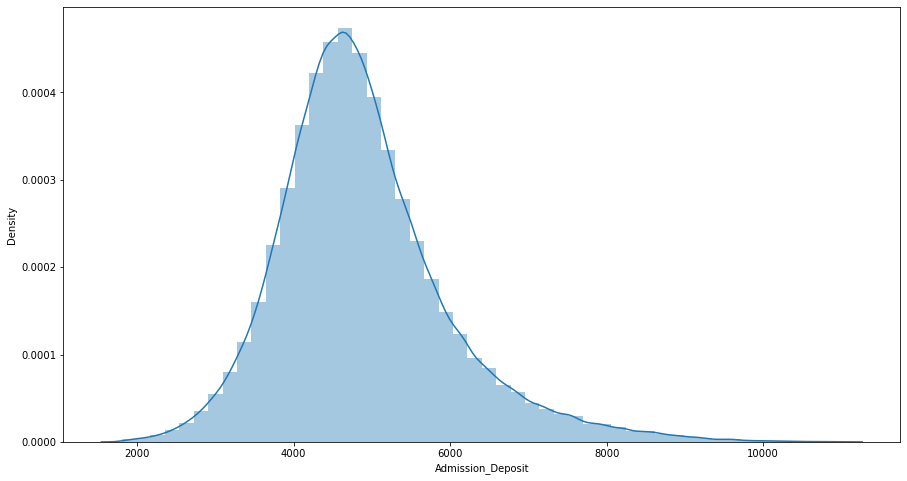

In [33]:
sns.distplot(df_num_train['Admission_Deposit'])

In [34]:
df_num_train['Admission_Deposit']=np.log(df_num_train['Admission_Deposit'])

In [35]:
df_num_train['Admission_Deposit'].skew()

0.0293591407297098

### Scale the Data

In [36]:
from sklearn.preprocessing import StandardScaler
# For training Data
sc = StandardScaler()

num_scaled = sc.fit_transform(df_num_train)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num_train.columns)

In [37]:
# For test Data

num_scaled_test = sc.fit_transform(df_num_test)

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = df_num_test.columns)

In [38]:
df_num_scaled.shape

(313793, 2)

In [39]:
df_cat_train = df_cat_train.reset_index(drop=True)

In [40]:
df_num_scaled = df_num_scaled.reset_index(drop=True)

In [41]:
df_cat_test = df_cat_test.reset_index(drop=True)
df_num_scaled_test = df_num_scaled_test.reset_index(drop=True)

In [42]:
df_cat_train.shape

(313793, 14)

In [43]:
df_full = pd.concat([df_num_scaled, df_cat_train],axis=1)
df_full_test =  pd.concat([df_num_scaled_test, df_cat_test],axis=1)

In [44]:
df_full.shape

(313793, 16)

In [45]:
df_full.head()

,Visitors with Patient,Admission_Deposit,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,-0.727035,0.136439,7,2,2,2,3,3,2,5,1,6,3,3,6,1
1,-0.727035,1.024238,1,2,4,2,2,3,3,5,1,6,1,3,6,2
2,-0.727035,-0.022078,9,4,0,0,2,1,3,4,1,6,1,3,6,2
3,-0.727035,1.946069,25,1,1,1,2,3,2,3,1,6,1,3,6,2
4,-0.727035,0.706962,25,1,1,1,2,3,3,3,1,6,1,3,6,2


<AxesSubplot:>

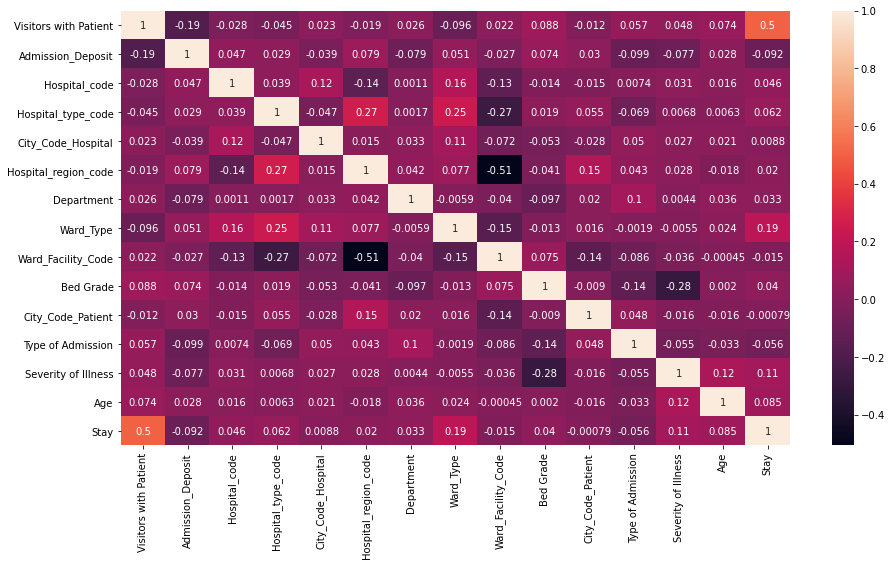

In [46]:
sns.heatmap(df_full.corr(), annot = True)

### Train Test Split

In [84]:
X = df_full.drop('Stay',axis=1)
y = df_full['Stay']

In [85]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (219655, 16)
y_train (219655,)
X_test (94138, 16)
y_test (94138,)


### K Fold Cross Validation

In [86]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10, shuffle=True, random_state=10)   

### Logistic Regression

In [87]:
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)
accuracy_score(y_test,y_pred_LR)*100 

72.95990991947991

In [89]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           1       0.75      0.94      0.84     55898
           2       0.66      0.46      0.54     31020
           3       0.72      0.26      0.39      7220

    accuracy                           0.73     94138
   macro avg       0.71      0.55      0.59     94138
weighted avg       0.72      0.73      0.70     94138



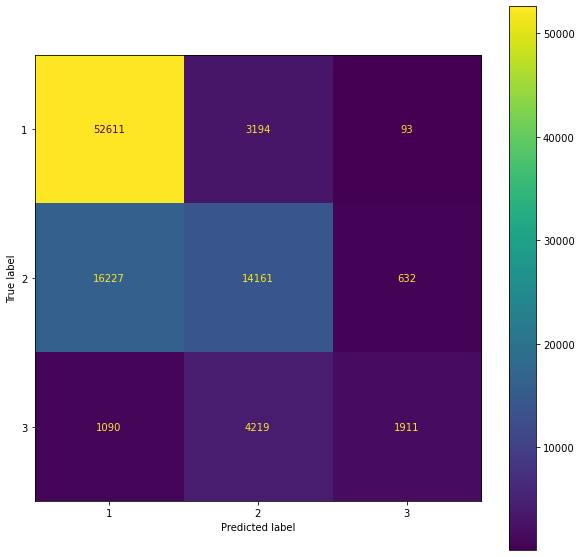

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(LR, X_test, y_test, ax=ax)

### Decision Tree

In [91]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_classification =decision_tree_classification.fit(X_train, y_train)

In [92]:
y_pred_DT=decision_tree_classification.predict(X_test)
accuracy_score(y_test,y_pred_DT)*100 

62.97563151968387

In [93]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           1       0.75      0.74      0.75     55898
           2       0.48      0.49      0.48     31020
           3       0.39      0.41      0.40      7220

    accuracy                           0.63     94138
   macro avg       0.54      0.54      0.54     94138
weighted avg       0.63      0.63      0.63     94138



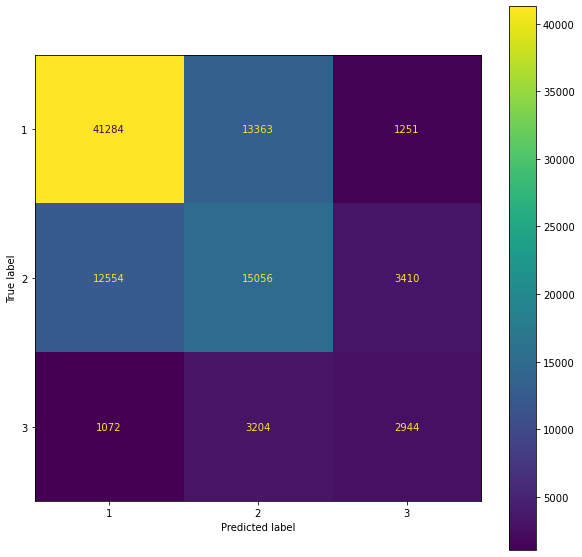

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(decision_tree_classification, X_test, y_test, ax=ax)

### Tuned HyperParameter Decision Tree

In [105]:
tuned_paramaters = {'max_depth':np.arange(1,100),'criterion' : ['entropy','gini']}  

from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(decision_tree_classification, tuned_paramaters, cv = kfold, scoring = 'f1_weighted')        

tree_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=10),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [106]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [95]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth=11, random_state = 10)

decision_tree_tuned = dt_tuned.fit(X_train, y_train)

In [96]:
y_pred_DT_tuned = decision_tree_tuned.predict(X_test)
accuracy_score(y_test,y_pred_DT_tuned)*100 

73.60364571161486

In [97]:
print(classification_report(y_test,y_pred_DT_tuned))

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     55898
           2       0.67      0.47      0.55     31020
           3       0.66      0.31      0.42      7220

    accuracy                           0.74     94138
   macro avg       0.70      0.57      0.60     94138
weighted avg       0.72      0.74      0.71     94138



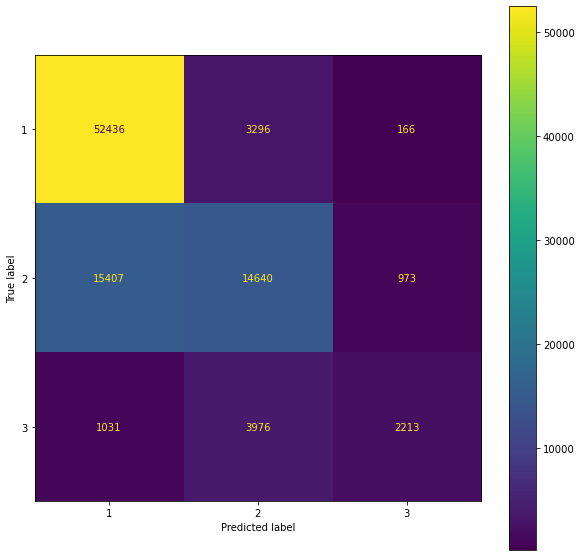

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(decision_tree_tuned, X_test, y_test, ax=ax)

### Random Forest

In [99]:
rf_classification = RandomForestClassifier(random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [100]:
y_pred_RF = rf_model.predict(X_test)
accuracy_score(y_test,y_pred_RF)*100 

73.06295013703287

In [101]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83     55898
           2       0.64      0.51      0.56     31020
           3       0.64      0.36      0.46      7220

    accuracy                           0.73     94138
   macro avg       0.68      0.59      0.62     94138
weighted avg       0.72      0.73      0.72     94138



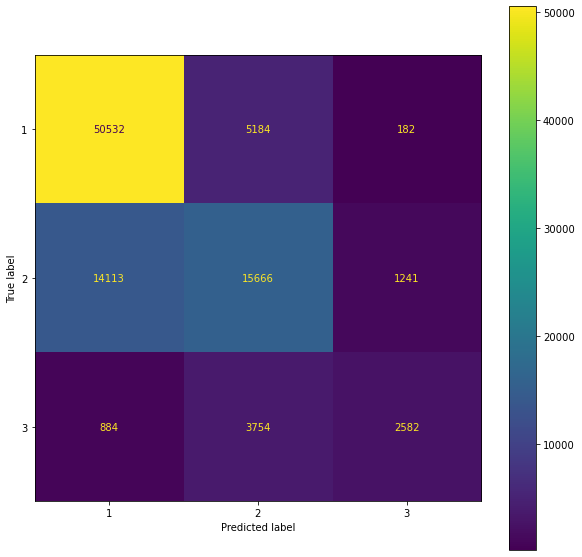

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_model, X_test, y_test, ax=ax)

### Tuned HyperParameter Random Forest

In [ ]:
tuned_paramaters = {'n_estimators':np.arange(1,50),'criterion' : ['entropy','gini']}  

from sklearn.model_selection import GridSearchCV

RF_grid = GridSearchCV(rf_classification, tuned_paramaters, cv = kfold)        

RF_grid.fit(X_train,y_train)

In [120]:
RF_grid.best_params_

{'criterion': 'gini', 'n_estimators': 47}

In [103]:
rf_classification_tuned = RandomForestClassifier(criterion = 'gini', n_estimators = 47, random_state = 10)

rf_model_tuned = rf_classification_tuned.fit(X_train, y_train)

In [104]:
y_pred_RF_tuned = rf_model_tuned.predict(X_test)
accuracy_score(y_test,y_pred_RF_tuned)*100 

72.83987337738213

In [105]:
print(classification_report(y_test,y_pred_RF_tuned))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83     55898
           2       0.63      0.51      0.56     31020
           3       0.64      0.36      0.46      7220

    accuracy                           0.73     94138
   macro avg       0.68      0.59      0.62     94138
weighted avg       0.71      0.73      0.71     94138



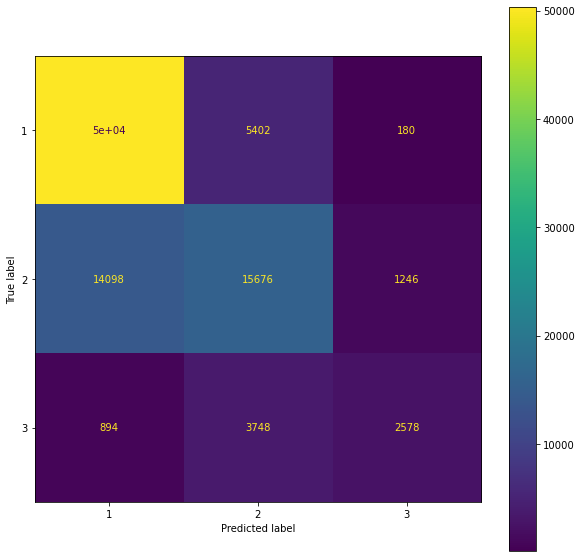

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_classification_tuned, X_test, y_test, ax=ax)

### ADA Boost - Decision Tree

In [158]:
ada_model_DT = AdaBoostClassifier(random_state = 10)

ada_model_DT.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [159]:
y_pred_ada_model_DT = ada_model_DT.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_DT)*100 

72.36185174955916

In [160]:
print(classification_report(y_test,y_pred_ada_model_DT))

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     55898
           2       0.63      0.48      0.55     31020
           3       0.64      0.27      0.38      7220

    accuracy                           0.72     94138
   macro avg       0.68      0.56      0.59     94138
weighted avg       0.71      0.72      0.70     94138



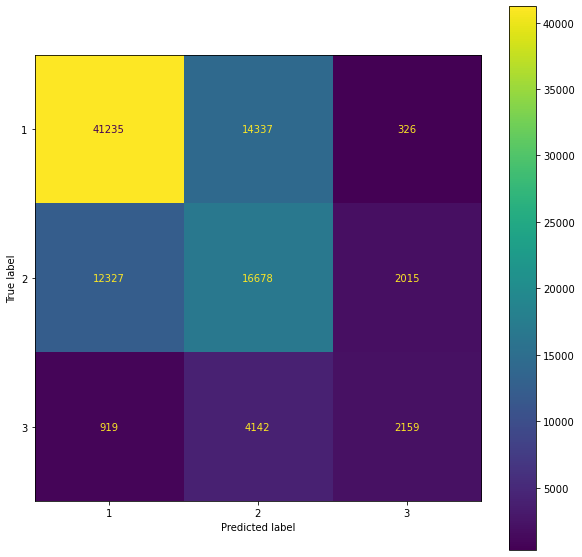

In [111]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_DT, X_test, y_test, ax=ax)

In [62]:
tuned_paramaters = {'n_estimators':np.arange(1,50)}  

from sklearn.model_selection import GridSearchCV

DT_AB_grid = GridSearchCV(ada_model_DT, tuned_paramaters, cv = kfold)        

DT_AB_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                                                random_state=10),
                                          random_state=10),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [161]:
ada_model_DT_tuned = AdaBoostClassifier(n_estimators = 36, random_state = 10)

ada_model_DT_tuned.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=36, random_state=10)

In [162]:
y_pred_ada_model_DT_tuned = ada_model_DT.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_DT_tuned)*100 

72.36185174955916

In [163]:
print(classification_report(y_test,y_pred_ada_model_DT_tuned))

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     55898
           2       0.63      0.48      0.55     31020
           3       0.64      0.27      0.38      7220

    accuracy                           0.72     94138
   macro avg       0.68      0.56      0.59     94138
weighted avg       0.71      0.72      0.70     94138



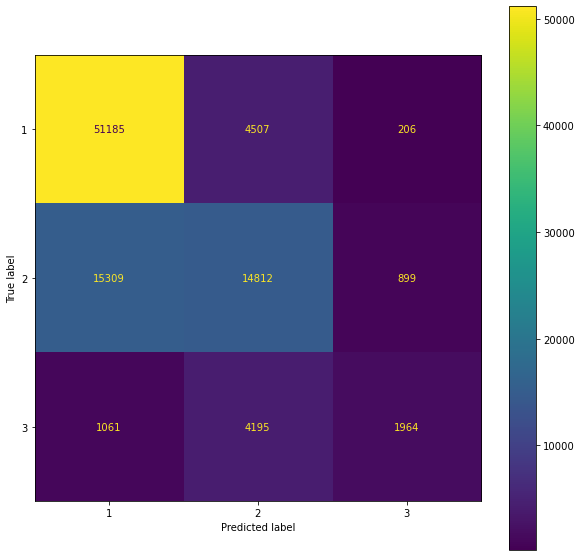

In [164]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_DT_tuned, X_test, y_test, ax=ax)


### Gradient boost

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=10)

In [126]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [127]:
y_pred_GB = GB.predict(X_test)
accuracy_score(y_test,y_pred_GB)*100 

74.12097133994774

In [128]:
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     55898
           2       0.69      0.46      0.55     31020
           3       0.70      0.31      0.43      7220

    accuracy                           0.74     94138
   macro avg       0.72      0.57      0.61     94138
weighted avg       0.73      0.74      0.72     94138



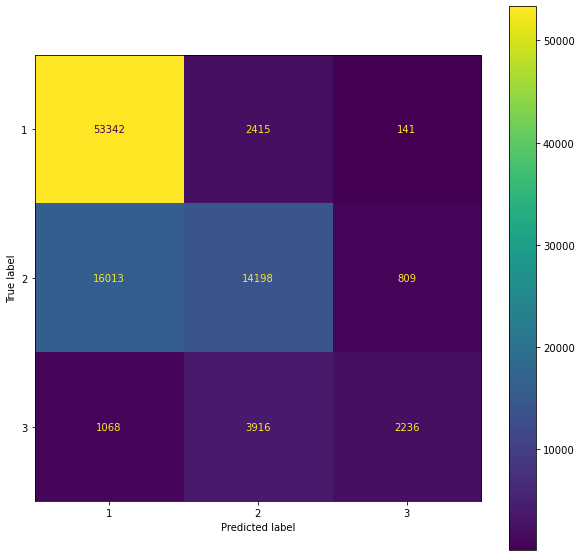

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB, X_test, y_test, ax=ax)

In [49]:
tuned_paramaters = {'n_estimators':np.arange(1,30)}  

from sklearn.model_selection import GridSearchCV

GB_grid = GridSearchCV(GB, tuned_paramaters, cv = kfold)        

GB_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [50]:
GB_grid.best_params_

{'n_estimators': 29}

In [130]:
GB_tuned=GradientBoostingClassifier(n_estimators=29, random_state=10)

In [131]:
GB_tuned.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=29, random_state=10)

In [132]:
y_pred_GB_tuned = GB_tuned.predict(X_test)
accuracy_score(y_test,y_pred_GB_tuned)*100 

73.80866387643673

In [133]:
print(classification_report(y_test,y_pred_GB_tuned))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84     55898
           2       0.69      0.44      0.54     31020
           3       0.68      0.32      0.43      7220

    accuracy                           0.74     94138
   macro avg       0.71      0.57      0.60     94138
weighted avg       0.73      0.74      0.71     94138



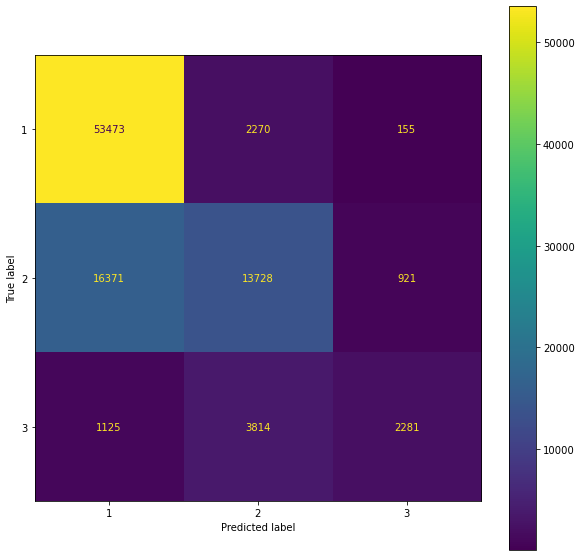

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB_tuned, X_test, y_test, ax=ax)

### Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [136]:
NB.fit(X_train,y_train)

GaussianNB()

In [137]:
y_pred_NB = NB.predict(X_test)
accuracy_score(y_test,y_pred_NB)*100 

70.36265907497503

In [138]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82     55898
           2       0.63      0.38      0.47     31020
           3       0.61      0.27      0.37      7220

    accuracy                           0.70     94138
   macro avg       0.65      0.53      0.56     94138
weighted avg       0.69      0.70      0.67     94138



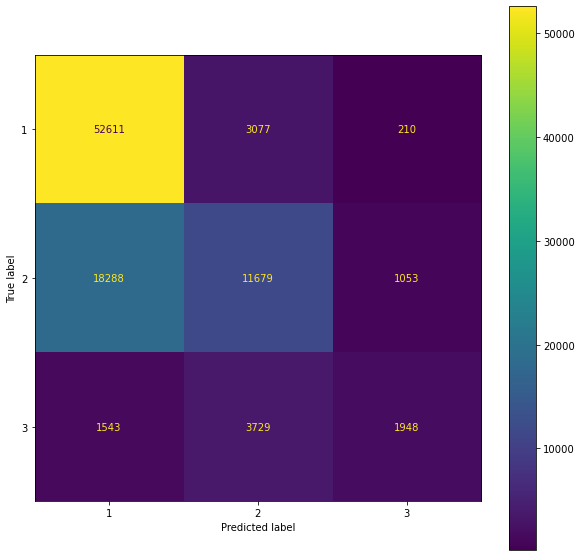

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(NB, X_test, y_test, ax=ax)

### KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=565,weights='distance')  

In [141]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=565, weights='distance')

In [142]:
y_pred_KNN = knn.predict(X_test)
accuracy_score(y_test,y_pred_KNN)*100 

64.49574029616095

In [143]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           1       0.65      0.98      0.78     55898
           2       0.56      0.19      0.28     31020
           3       0.90      0.05      0.09      7220

    accuracy                           0.64     94138
   macro avg       0.71      0.40      0.38     94138
weighted avg       0.64      0.64      0.56     94138



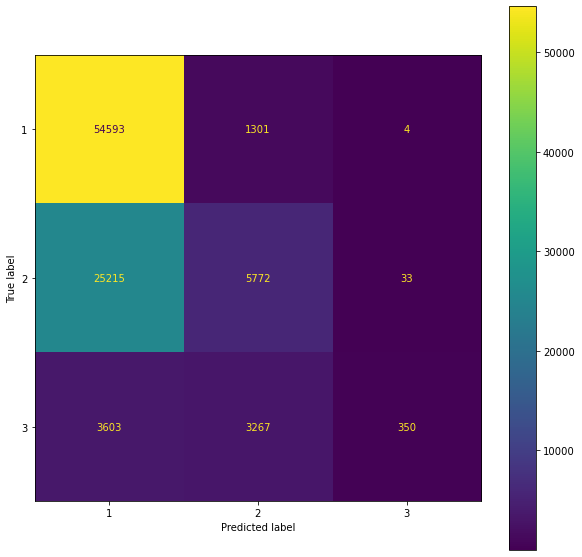

In [144]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test, ax=ax)

### CATBoost

In [145]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(random_state=10,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.120271
0:	learn: 1.0109532	test: 1.0113451	best: 1.0113451 (0)	total: 280ms	remaining: 4m 39s
100:	learn: 0.6157291	test: 0.6202168	best: 0.6202168 (100)	total: 8.16s	remaining: 1m 12s
200:	learn: 0.6034195	test: 0.6112374	best: 0.6112374 (200)	total: 16.1s	remaining: 1m 4s
300:	learn: 0.5966575	test: 0.6081765	best: 0.6081765 (300)	total: 24.9s	remaining: 57.7s
400:	learn: 0.5914307	test: 0.6064945	best: 0.6064917 (399)	total: 33.3s	remaining: 49.7s
500:	learn: 0.5872020	test: 0.6053392	best: 0.6053369 (499)	total: 41.6s	remaining: 41.5s
600:	learn: 0.5835444	test: 0.6046213	best: 0.6046213 (600)	total: 50.1s	remaining: 33.2s
700:	learn: 0.5800775	test: 0.6042402	best: 0.6042386 (698)	total: 1m 1s	remaining: 26.4s
800:	learn: 0.5767740	test: 0.6039845	best: 0.6039645 (797)	total: 1m 11s	remaining: 17.7s
900:	learn: 0.5738134	test: 0.6038980	best: 0.6038802 (884)	total: 1m 19s	remaining: 8.77s
999:	learn: 0.5709931	test: 0.6038069	best: 0.6038069 (999)	total: 1m 

In [146]:
cb_pred = cb.predict(X_test)
accuracy_score(y_test,cb_pred)*100 

74.52144723703499

In [147]:
print(classification_report(y_test,cb_pred))

              precision    recall  f1-score   support

           1       0.77      0.94      0.85     55898
           2       0.69      0.48      0.56     31020
           3       0.70      0.34      0.46      7220

    accuracy                           0.75     94138
   macro avg       0.72      0.59      0.62     94138
weighted avg       0.73      0.75      0.72     94138



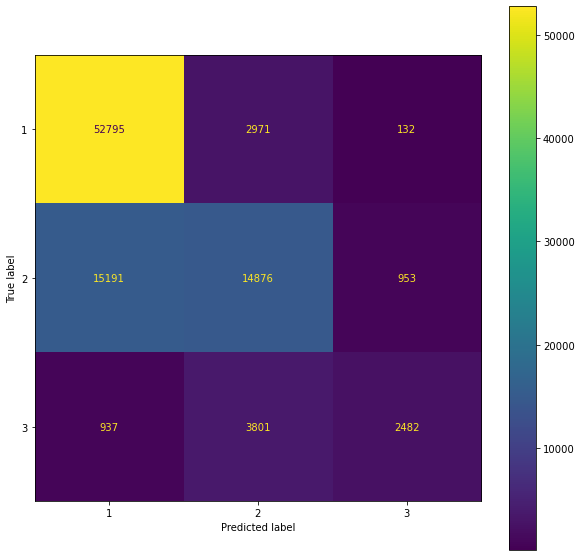

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cb, X_test, y_test, ax=ax)

### Submission

In [149]:
ls  =  df_full_test.columns.tolist()

in_data  =  df_full_test[ls]

out_data =  cb.predict (in_data)

In [150]:
test = pd.read_csv('test_data.csv')
submit =  pd.DataFrame()

In [155]:
submit ['case_id']  =  test['case_id']
submit ['Stay']     =  out_data

stay_decode         =  {  1 : '0-30', 2 : '31-70', 3 : '71+' }

submit ['Stay']     =  submit ['Stay'].map(stay_decode)

submit.head(15)

,case_id,Stay
0,318439,0-30
1,318440,31-70
2,318441,0-30
3,318442,0-30
4,318443,31-70
5,318444,0-30
6,318445,0-30
7,318446,0-30
8,318447,0-30
9,318448,0-30


In [156]:
count = submit ['Stay'].value_counts()
count

0-30     100720
31-70     30974
71+        5363
Name: Stay, dtype: int64

<AxesSubplot:>

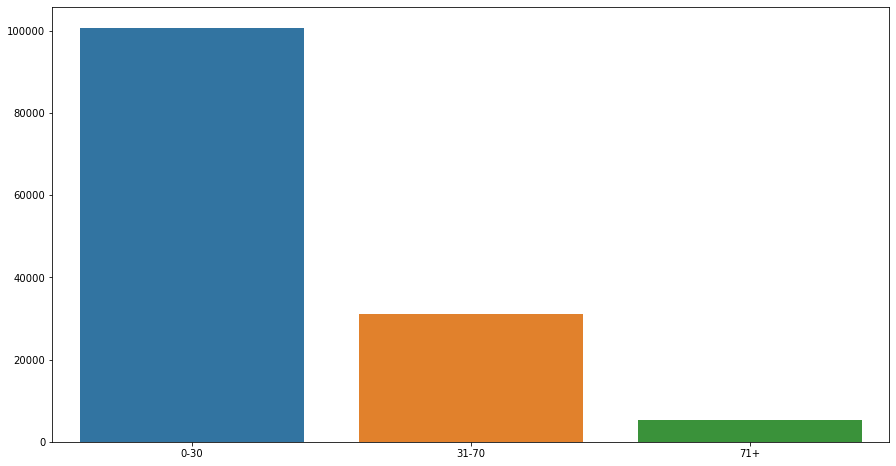

In [157]:
sns.barplot(x=count.index.values, y=count.values,data=submit)